In [1]:
import interpretdl as it

# SG and Evalaution

W0302 11:22:02.952796 26745 device_context.cc:447] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 10.2, Runtime API Version: 10.2
W0302 11:22:02.958534 26745 device_context.cc:465] device: 0, cuDNN Version: 7.6.
/root/codespace/InterpretDL/interpretdl/interpreter/abc_interpreter.py:83: UserWarning: ``use_cuda`` would be deprecated soon. Use ``device`` directly.
  Interpreter.__init__(self, paddle_model, device, use_cuda, **kwargs)
/opt/conda/envs/pp2/lib/python3.7/site-packages/paddle/fluid/dygraph/varbase_patch_methods.py:392: UserWarning: 
tensor.grad will return the tensor value of the gradient. This is an incompatible upgrade for tensor.grad API.  It's return type changes from numpy.ndarray in version 2.0 to paddle.Tensor in version 2.1.0.  If you want to get the numpy value of the gradient, you can use :code:`x.grad.numpy()` 
  warnings.warn(warning_msg)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████

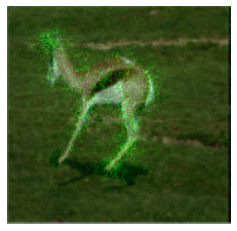

In [2]:
from paddle.vision.models import resnet50
paddle_model = resnet50(pretrained=True)
img_path = 'assets/deer.png'
sg = it.SmoothGradInterpreter(paddle_model, device='gpu:0')
exp = sg.interpret(
        img_path, 
        noise_amount=0.1,
        visual=True, 
        labels=None, 
        save_path=None)

In [4]:
import numpy as np

evaluator = it.PointGame()
sg_var = np.sum(np.abs(exp), axis=(0,1))
r = evaluator.evaluate((20, 15, 155, 185), sg_var)

In [5]:
r

{'precision': 0.9993997599039616,
 'recall': 0.07254901960784314,
 'f1_score': 0.13527774185534555,
 'auc_score': 0.8608963658422573,
 'ap_score': 0.8643936544058852}

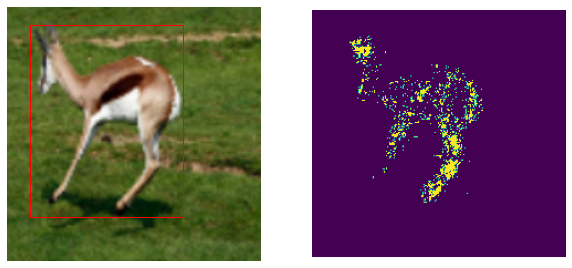

In [6]:
# SG

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from interpretdl.data_processor.readers import read_image

cols = 2
psize = 5
fig, ax = plt.subplots(1, cols, figsize=(cols*psize, 1*psize))
rect = patches.Rectangle((20, 15), 135, 170, linewidth=1, edgecolor='r', facecolor='none')

img_path = 'assets/deer.png'
x = Image.fromarray(read_image(img_path)[0])

ax[0].axis('off')
ax[0].imshow(x)
ax[0].add_patch(rect)

ax[1].axis('off')
ax[1].imshow(sg_var > np.max(sg_var) * 0.25)

# LIME and Evaluation

/root/codespace/InterpretDL/interpretdl/interpreter/abc_interpreter.py:175: UserWarning: ``use_cuda`` would be deprecated soon. Use ``device`` directly.
  Interpreter.__init__(self, paddle_model, device, use_cuda, **kwargs)
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:13<00:00, 150.58it/s]


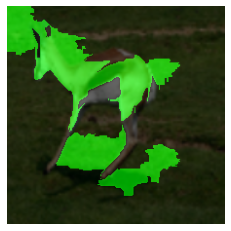

In [7]:
from paddle.vision.models import resnet50
paddle_model = resnet50(pretrained=True)
img_path = 'assets/deer.png'
lime = it.LIMECVInterpreter(paddle_model, device='gpu:0')
lime_weights = lime.interpret(
    img_path,
    num_samples=2000,
    batch_size=50,
    visual=True,
    save_path=None
)

In [9]:
from interpretdl.data_processor.visualizer import sp_to_array

label = list(lime_weights.keys())[0]
exp_array = sp_to_array(lime.lime_results['segmentation'], lime_weights[label])

evaluator = it.PointGame()
r = evaluator.evaluate((20, 15, 155, 185), exp_array)

In [10]:
r

{'precision': 1.0,
 'recall': 0.1532461873638344,
 'f1_score': 0.26576468435034173,
 'auc_score': 0.6575020457345095,
 'ap_score': 0.7216801904901232}

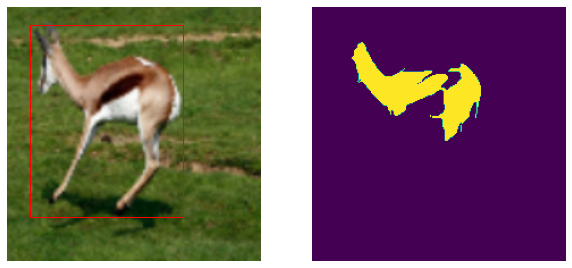

In [11]:
# LIME
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from interpretdl.data_processor.readers import read_image

cols = 2
psize = 5
fig, ax = plt.subplots(1, cols, figsize=(cols*psize, 1*psize))
rect = patches.Rectangle((20, 15), 135, 170, linewidth=1, edgecolor='r', facecolor='none')

img_path = 'assets/deer.png'
x = Image.fromarray(read_image(img_path)[0])

ax[0].axis('off')
ax[0].imshow(x)
ax[0].add_patch(rect)

ax[1].axis('off')
ax[1].imshow(exp_array > np.max(exp_array) * 0.25)